In [11]:
import cymetric as cym
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [12]:
#load db in a evaler
with cym.dbopen('cyclus.sqlite') as db:
    evaler = cym.Evaluator(db)

In [13]:
#db.tables

In [14]:
#get transation & Agent tables
trans = evaler.eval('Transactions')
agents = evaler.eval('AgentEntry')

In [15]:
#build 2 table for SenderId and ReceiverId
agents_Sender = agents.rename(index=str, columns={'AgentId': 'SenderId'})
agents_Receiver = agents.rename(index=str, columns={'AgentId': 'ReceiverId'})

In [16]:
#Merge SenderId into Transaction
df = pd.merge(agents_Sender[['SimId', 'SenderId', 'Prototype']], trans, on=['SimId', 'SenderId'])
#rename Proto into SenderProto
df = df.rename(index=str, columns={'Prototype': 'SenderProto'})
#remove SenderId from transation table (cleaning)
df = df.drop('SenderId',1)

In [17]:
#Same for Receiver ...
df = pd.merge(agents_Receiver[['SimId', 'ReceiverId', 'Prototype']], df, on=['SimId', 'ReceiverId'])
df = df.rename(index=str, columns={'Prototype': 'ReceiverProto'})
df = df.drop('ReceiverId',1)
#df

In [19]:
#Get Ressource Table
ressource = evaler.eval('Resources')
#ressource

In [20]:
df = pd.merge(ressource[['SimId', 'ResourceId','QualId','Quantity','Units'  ]], df, on=['SimId', 'ResourceId'])


In [21]:
df = df.drop('ResourceId',1)
#df

In [22]:
trans = df[['SenderProto', 'ReceiverProto','Time', 'Quantity']].groupby(['ReceiverProto', 'SenderProto','Time'
]).sum()
trans

Quantity
ReceiverProto    SenderProto    Time             
J1_prime_storage PWR_separation 150   9233.027283
                                204   9226.117384
                                258   9218.764901
                                312   9211.470209
                                366   9204.853378
                                420   9199.447484
                                474   9195.423888
                                528   9192.539985
                                582   9191.493592
                                636   9191.558636
                                690   9193.287669
                                744   9195.136349
                                798   9198.066879
                                852   9200.173147
                                906   9202.818129
                                960   9204.649196
                                1014  9206.350931
                                1068  9208.230442
                                1122  9209.975012
                                1176  9211.007331
                                1230  9212.243105
                                1284  9213.101073
                                1338  9214.183738
                                1392  9214.916059
                                1446  9215.597020
                                1500  9216.214664
                                1554  9216.841928
                                1608  9217.063298
                                1662  9217.576368
                                1716  9218.067177
...                                           ...
waste            PWR_separation 1986   774.243822
                                2040   773.392460
                                2094   772.572874
                                2148   771.767188
                                2202   770.593590
                                2256   770.101909
                                2310   769.742380
                                2364   769.223403
                                2418   765.662208
                                2472   765.395310
                                2526   767.821207
                                2580   764.857596
                                2634   761.402920
                                2688   763.836031
                                2742   763.756783
                                2796   763.461024
                                2850   760.075149
                                2904   759.955487
                                2958   759.912874
                                3012   759.677883
                                3066   759.002890
                                3120   758.945726
                                3174   758.961072
                                3228   758.768129
                                3282   758.139641
                                3336   758.105077
                                3390   758.175971
                                3444   758.032120
                                3498   757.434697
                                3552   757.440408

[1089 rows x 1 columns]

In [23]:
toplot = trans.loc['PWR_fabrication'].loc['u_mixer']
toplot.reset_index(inplace=True)
toplot

,Time,Quantity
0,2,68532.338308
1,3,20162.661692
2,10,81722.255971
3,64,81025.417555
4,118,80285.127500
5,172,79588.484300
6,226,78979.010930
7,280,78500.204406
8,334,78152.024990
9,388,77891.015243


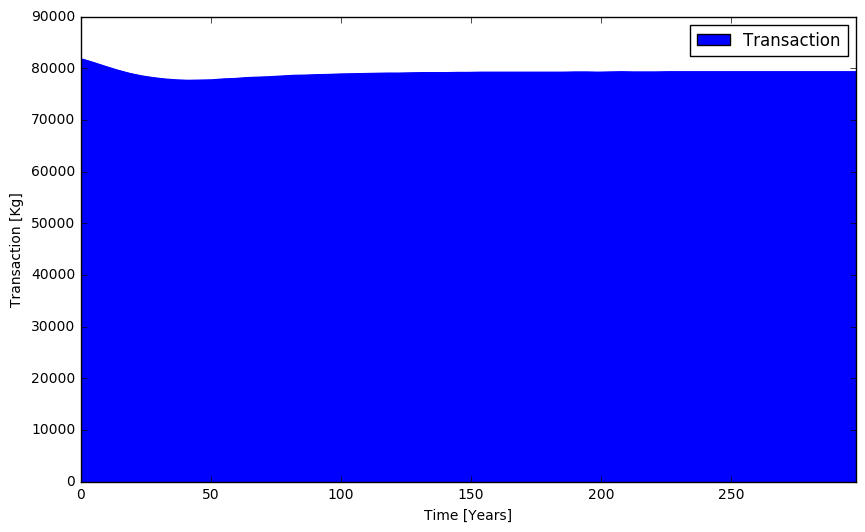

In [13]:
myplot = pd.DataFrame({'Time': toplot.Time/12., 'Transaction': toplot.Quantity})
myplot = myplot.groupby('Time').sum()
myplot.plot(kind='area', figsize=(10, 6))
plt.xlabel('Time [Years]')
plt.ylabel('Transaction [Kg]')
plt.savefig('test.png', dpi=326)


In [14]:
receiver = trans.index.levels[0]
receiver

Index(['J1_prime_storage', 'J1_second_storage_pu', 'J1_second_storage_u',
       'PWR', 'PWR_cooling', 'PWR_fabrication', 'PWR_separation',
       'PWR_storage', 'pu_mixer', 'u_mixer', 'waste'],
      dtype='object', name='ReceiverProto')

In [15]:
sender = trans.index.levels[1]
sender

Index(['E3_limited_source_pu', 'E3_limited_source_u', 'J1_limited_source_pu',
       'J1_limited_source_u', 'J1_second_storage_pu', 'PWR', 'PWR_cooling',
       'PWR_fabrication', 'PWR_separation', 'PWR_storage', 'pu_mixer',
       'u_mixer'],
      dtype='object', name='SenderProto')

In [16]:
trans.index.levels[2]

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            3520, 3521, 3522, 3550, 3551, 3552, 3573, 3574, 3575, 3576],
           dtype='int64', name='Time', length=468)

In [17]:
compo = evaler.eval('Compositions')
#compo

In [18]:
df = pd.merge(compo[['SimId', 'QualId','QualId','NucId','MassFrac'  ]], df, on=['SimId', 'ResourceId'])

KeyError: 'ResourceId'